## Title
Insurance Fraud Detection Using Machine Learning And Deep Learning Techniques.

## Problem Statement
Quick Insurance Company (QIC) has been facing fraudulent claims for the past couple of years now. Because of this, 30% of their stuffs have been layed off. They accused these people for not paying enough attention when an individual files for a claim. Recently, they had a new CEO called Mr. Debrah. Just after he joined, someone made a fraudulent claim and the person succeded. After this incident, he relized that there has been more cases similar to this one. Enough is enough said Mr. Debrah, I have to put a stop to this act as soon as possible as the new CEO.

I have to contact King (Mr. Debrah's friend who is an IT expect). He called him and they meet later in the day to discuss the situation and measures to put inplace to help him prevent more fraudulent claims from happening in the near futer. I will get back to you said King. A few weeks later, King got back to him telling him of a solution he had in mind. He said, I could come up with a system that can help to detect fraud when someone tries to file for a claim. He explianed everything to Mr. Debrah who was very happy to hear of this new solution. He gave King permission to start as soon as possible by providing him with all the neccessary materials including datasets which contains fraudulent and non fraudulent claims made in the organization (requested by King). The `AIM` of this project is to build the system proposed by King to help Mr. Debrah detect fraudulent claims when a user files for one.


## Evaluation
If we are able to get an accuracy score between **80** and **100** percent and a lower loss value between 0 and 20, then our model is ready to be in production.This will be based on the evaluation metrics used to evaluate our models. **Note:** We will be building many different models by performing different machine learning experiments untill we hit our targeted scores.

## Evaluation Metrics Used
* Classification Report
* F1 Score
* Recall
* Precision Score
* Confusion Metrics
* AUC Curve

## Algorithms To Use
* GradientBoostingClassifier
* LinearDiscriminantAnalysis
* Random Forest Classifier
* Support Vector Machine
* ExtraTreesClassifier
* Logistic Regression
* k-Nearest Neighbors
* AdaBoostClassifier
* MLPClassifier
* Decision Tree
* Naive Bayes
* neural_network
* LightGBM


Okay so now that we have succesfully imported our libries needed, we are now going to start by exploring our datasets. We are going to familiarize ourselves with the databaset and explore all features by comparing features to each other and many other techniques by visualizing most of them. But before we start, let us try to import our dataset from its source. Lets continue without wasting much time.

In [2]:
#Import core libris
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#Import other tools
import zipfile

In [3]:
#Get Dataset from azure storage account
try:
    
    ## Lets bring in our dataset now
    df=pd.read_csv("../data/fraud_insurance_claims.csv", na_values="?")

except:
    
    # Get incoming dataset
    !wget https://publicimages0.blob.core.windows.net/datasets/Tabular/insurance_fraud_claim/fraud_insurance_claims.zip
    !mv fraud_insurance_claims.zip ../data
    data=zipfile.ZipFile("../data/fraud_insurance_claims.zip")
    data.extractall("../data/")
    data.close()
    
    ## Lets bring in our dataset now
    df=pd.read_csv("../data/fraud_insurance_claims.csv", na_values="?")

In [4]:
# Allow display of all features in dataset
pd.set_option('display.max_columns', None)

# Display databaset if download successfully
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17 00:00:00,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25 00:00:00,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27 00:00:00,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21 00:00:00,Vehicle Theft,NaN,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NaN,0,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06 00:00:00,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22 00:00:00,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25 00:00:00,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10 00:00:00,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NaN,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06 00:00:00,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17 00:00:00,Vehicle Theft,NaN,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [5]:
#Get column names
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [64]:
# Check dataset shape
df.shape

(1000, 39)

In [19]:
#Lets check total number of sample in each fraud_report feature
df.fraud_reported.value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

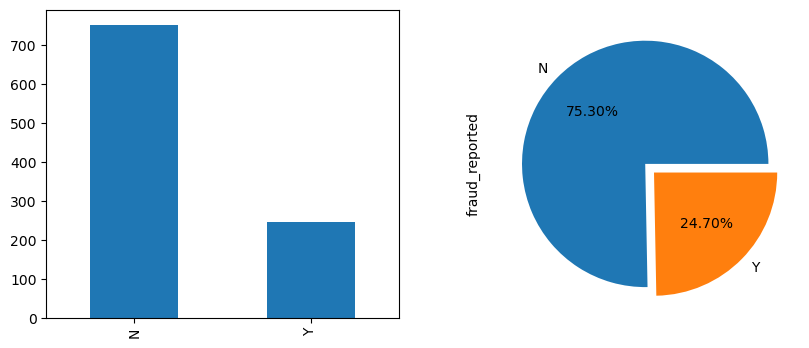

In [26]:
#lets visualize the total number of sample in each fraud_report feature
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
df.fraud_reported.value_counts().plot(kind="bar")

plt.subplot(1, 2, 2)
df.fraud_reported.value_counts().plot(kind="pie",autopct="%.2f%%", explode=[0.0, 0.1])
plt.show()

In [27]:
#Display datasets
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17 00:00:00,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25 00:00:00,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27 00:00:00,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21 00:00:00,Vehicle Theft,NaN,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NaN,0,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06 00:00:00,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22 00:00:00,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25 00:00:00,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10 00:00:00,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NaN,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06 00:00:00,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17 00:00:00,Vehicle Theft,NaN,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [48]:
#Check for null values
df.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

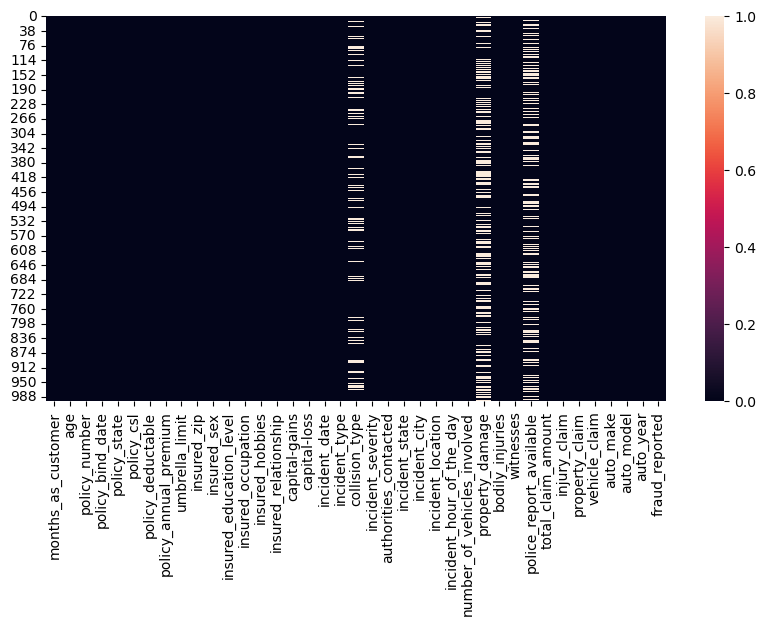

In [58]:
#Lets visualize null values in our dataset
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())
plt.show()

In [56]:
#Check dataset types
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [57]:
# Get informations on the datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [62]:
# Lets describe the datasets to get some statistical informations on it
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


### Observation
We have successfully made base analysis on the entire dataset to get some information from it and from our analysis, we can see the following out come:

1. The dataset contains 1,000 total datasets(rows) and 39 feature(colum)
2. The total number of claims marked as fraud is less than claims marked as not fraud
3. The dataset is not balanced hence we have to balance it going forward
4. The dataset contains Nan values
5. The dataset is made of both numeric and categorical features

### Performing Univariate, Bivariate and Multivariate analysis on our features
Okay so we have successfully been able to perform some analysis on the entire datasets. Now, we are going to analysis individual features by comparing features to each other and also by visualizing each outcome to gain more insight in our datasets to become one with it. Okay so without wasting much time, let's get started now.


In [76]:
# Lets use a loop to loop through our dataset to check the total number of unique values in each feature
for col in df.columns:
    print({col: df[col].nunique()})
    

{'months_as_customer': 391}
{'age': 46}
{'policy_number': 1000}
{'policy_bind_date': 951}
{'policy_state': 3}
{'policy_csl': 3}
{'policy_deductable': 3}
{'policy_annual_premium': 991}
{'umbrella_limit': 11}
{'insured_zip': 995}
{'insured_sex': 2}
{'insured_education_level': 7}
{'insured_occupation': 14}
{'insured_hobbies': 20}
{'insured_relationship': 6}
{'capital-gains': 338}
{'capital-loss': 354}
{'incident_date': 60}
{'incident_type': 4}
{'collision_type': 3}
{'incident_severity': 4}
{'authorities_contacted': 5}
{'incident_state': 7}
{'incident_city': 7}
{'incident_location': 1000}
{'incident_hour_of_the_day': 24}
{'number_of_vehicles_involved': 4}
{'property_damage': 2}
{'bodily_injuries': 3}
{'witnesses': 4}
{'police_report_available': 2}
{'total_claim_amount': 763}
{'injury_claim': 638}
{'property_claim': 626}
{'vehicle_claim': 726}
{'auto_make': 14}
{'auto_model': 39}
{'auto_year': 21}
{'fraud_reported': 2}


In [ ]:
# L